_Lambda School Data Science_

# Scrape and process data

Objectives
- scrape and parse web pages
- use list comprehensions
- select rows and columns with pandas

Links
-  [Automate the Boring Stuff with Python, Chapter 11](https://automatetheboringstuff.com/chapter11/)
  - Requests
  - Beautiful Soup
- [Python List Comprehensions: Explained Visually](https://treyhunner.com/2015/12/python-list-comprehensions-now-in-color/)
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
  - Subset Observations (Rows)
  - Subset Variables (Columns)
- Python Data Science Handbook
  - [Chapter 3.1](https://jakevdp.github.io/PythonDataScienceHandbook/03.01-introducing-pandas-objects.html), Introducing Pandas Objects
  - [Chapter 3.2](https://jakevdp.github.io/PythonDataScienceHandbook/03.02-data-indexing-and-selection.html), Data Indexing and Selection


## Scrape the titles of PyCon 2019 talks

In [0]:
url = 'https://us.pycon.org/2019/schedule/talks/list/'

In [0]:
import bs4
import requests

result = requests.get(url)

In [0]:
soup = bs4.BeautifulSoup(result.text)

titles = [tag.text.strip() for tag in soup.select('h2')]


## 5 ways to look at long titles

Let's define a long title as greater than 80 characters

### 1. For Loop

In [0]:
long_titles_for_loop = []

for title in titles:
  if len(titles) > 80:
    long_titles_for_loop.append(title)
    


### 2. List Comprehension

In [0]:
long_titles_list_comp = [title for title in titles if len(title) > 80]

### 3. Filter with named function

In [0]:
def long(title):
  return len(title) > 80

long_titles_named_func = list(filter(long, titles))

### 4. Filter with anonymous function

In [0]:
long_titles_anon_func = list(filter(lambda x: len(x) > 80, titles))

### 5. Pandas

pandas documentation: [Working with Text Data](https://pandas.pydata.org/pandas-docs/stable/text.html)

In [0]:
import pandas as pd

pd.options.display.max_colwidth = 200

In [50]:
df = pd.DataFrame({'title': titles})

long_titles_pd = df[df['title'].str.len() > 80]

df.head()


,title
0,5 Steps to Build Python Native GUI Widgets for BeeWare
1,8 things that happen at the dot: Attribute Access & Descriptors
2,Account Security Patterns: How Logged-In Are you?
3,Ace Your Technical Interview Using Python
4,Advanced asyncio: Solving Real-world Production Problems


## Make new dataframe columns

pandas documentation: [apply](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.apply.html)

### title length

In [51]:
df['title_length'] = df.title.apply(len)
df.head()

,title,title_length
0,5 Steps to Build Python Native GUI Widgets for BeeWare,54
1,8 things that happen at the dot: Attribute Access & Descriptors,64
2,Account Security Patterns: How Logged-In Are you?,49
3,Ace Your Technical Interview Using Python,41
4,Advanced asyncio: Solving Real-world Production Problems,56


### long title

In [52]:
df['long_title'] = df['title_length'] > 80
df.head()

,title,title_length,long_title
0,5 Steps to Build Python Native GUI Widgets for BeeWare,54,False
1,8 things that happen at the dot: Attribute Access & Descriptors,64,False
2,Account Security Patterns: How Logged-In Are you?,49,False
3,Ace Your Technical Interview Using Python,41,False
4,Advanced asyncio: Solving Real-world Production Problems,56,False


### first letter

In [53]:
df['first_letter'] = df['title'].str[0]
df.head()

,title,title_length,long_title,first_letter
0,5 Steps to Build Python Native GUI Widgets for BeeWare,54,False,5
1,8 things that happen at the dot: Attribute Access & Descriptors,64,False,8
2,Account Security Patterns: How Logged-In Are you?,49,False,A
3,Ace Your Technical Interview Using Python,41,False,A
4,Advanced asyncio: Solving Real-world Production Problems,56,False,A


### word count

Using [`textstat`](https://github.com/shivam5992/textstat)

In [54]:
!pip install textstat

In [55]:
import textstat

df['title_word_count'] = df['title'].apply(textstat.lexicon_count)
df.head()

,title,title_length,long_title,first_letter,title_word_count
0,5 Steps to Build Python Native GUI Widgets for BeeWare,54,False,5,10
1,8 things that happen at the dot: Attribute Access & Descriptors,64,False,8,10
2,Account Security Patterns: How Logged-In Are you?,49,False,A,7
3,Ace Your Technical Interview Using Python,41,False,A,6
4,Advanced asyncio: Solving Real-world Production Problems,56,False,A,6


## Rename column

`title length` --> `title character count`

pandas documentation: [rename](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rename.html)

In [56]:
df.rename(columns={'title_length': 'title character count'}, inplace=True)
df.head()

,title,title character count,long_title,first_letter,title_word_count
0,5 Steps to Build Python Native GUI Widgets for BeeWare,54,False,5,10
1,8 things that happen at the dot: Attribute Access & Descriptors,64,False,8,10
2,Account Security Patterns: How Logged-In Are you?,49,False,A,7
3,Ace Your Technical Interview Using Python,41,False,A,6
4,Advanced asyncio: Solving Real-world Production Problems,56,False,A,6


## Analyze the dataframe

### Describe

pandas documentation: [describe](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html)

In [57]:
df.describe()

,title character count,title_word_count
count,95.000000,95.000000
mean,51.347368,7.978947
std,17.729509,3.218890
min,20.000000,2.000000
25%,37.000000,6.000000
50%,52.000000,7.000000
75%,62.000000,9.500000
max,95.000000,19.000000


### Sort values

pandas documentation: [sort_values](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html)

Five shortest titles, by character count

In [58]:
sorted_df = df.sort_values(by='title character count')

five_shortest_titles = list(sorted_df.title[0:5])

five_shortest_titles

['Practical decorators',
 'Python Security Tools',
 'Type hinting (and mypy)',
 'The Zen of Python Teams',
 'Measuring Model Fairness']

Titles sorted reverse alphabetically

In [59]:
alpha_sort_reverse = df.sort_values(by='title', ascending=False)

reverse_sorted_titles = list(alpha_sort_reverse['title'])

reverse_sorted_titles

['¡Escuincla babosa!: Creating a telenovela script in three Python deep learning frameworks',
 'to GIL or not to GIL: the Future of Multi-Core (C)Python',
 "Working with Time Zones: Everything You Wish You Didn't Need to Know",
 'Wily Python: Writing simpler and more maintainable Python',
 "What's new in Python 3.7",
 'What is a PLC and how do I talk Python to it?',
 'Understanding Python’s Debugging Internals',
 'Type hinting (and mypy)',
 'Time to take out the rubbish: garbage collector',
 'Thoth - how to recommend the best possible libraries for your application',
 'Thinking like a Panda: Everything you need to know to use pandas the right way.',
 'Thinking Inside the Box: How Python Helped Us Adapt to An Existing Data Ingestion Pipeline',
 'Things I Wish They Told Me About The Multiprocessing Module in Python 3',
 'The Zen of Python Teams',
 'The Refactoring Balance Beam: When to Make Changes and When to Leave it Alone',
 'The Perils of Inheritance: Why We Should Prefer Composition

### Get value counts

pandas documentation: [value_counts](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html)


Frequency counts of first letters

In [60]:
df.first_letter.value_counts()

T    12
A    11
P     8
M     8
E     7
S     6
B     6
H     5
L     4
G     4
D     4
W     4
C     3
F     3
I     2
R     2
U     1
8     1
t     1
¡     1
O     1
5     1
Name: first_letter, dtype: int64

Percentage of talks with long titles

In [61]:
df['long_title'].value_counts(normalize=True)

False    0.915789
True     0.084211
Name: long_title, dtype: float64

### Plot

pandas documentation: [Visualization](https://pandas.pydata.org/pandas-docs/stable/visualization.html)





Top 5 most frequent first letters

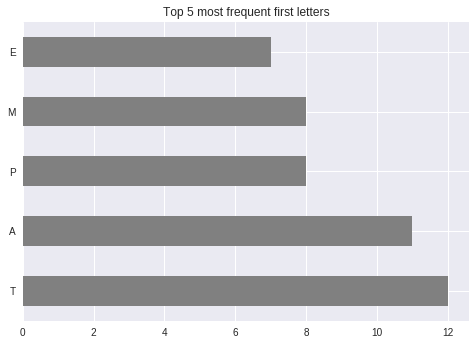

In [62]:
(df.first_letter
 .value_counts()
 .head(5)
 .plot
 .barh(color='grey',
      title='Top 5 most frequent first letters'));

Histogram of title lengths, in characters

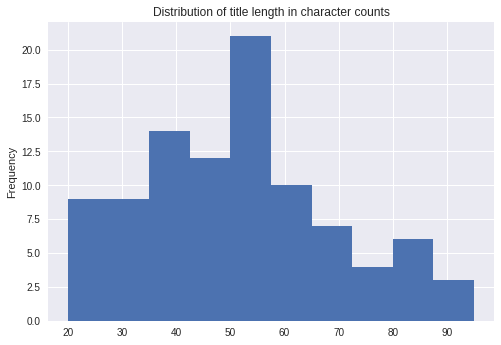

In [63]:
hist_title = 'Distribution of title length in character counts'
df['title character count'].plot.hist(title=hist_title);

# Assignment

**Scrape** the talk descriptions. Hint: `soup.select('.presentation-description')`

**Make** new columns in the dataframe:
- description
- description character count
- description word count

**Describe** all the dataframe's columns. What's the average description word count? The minimum? The maximum?

**Answer** the question: Which descriptions could fit in a tweet?




In [0]:
#Scrape the talk descriptions. Hint: soup.select('.presentation-description')

descriptions = [desc.text for desc in soup.select('.presentation-description')]


In [0]:
#Make new columns in the dataframe:
  
#description

df['description'] = descriptions

In [0]:
#description character count

df['description_character_count'] = df['description'].apply(len)

In [0]:
#description word count

df['description_word_count'] = df['description'].apply(textstat.lexicon_count)

In [87]:
#Describe all the dataframe's columns. What's the average description word count? The minimum? The maximum?
df.describe()

,title character count,title_word_count,description_character_count,description_word_count
count,95.000000,95.000000,95.000000,95.000000
mean,51.347368,7.978947,813.789474,130.821053
std,17.729509,3.218890,416.074535,64.357872
min,20.000000,2.000000,122.000000,20.000000
25%,37.000000,6.000000,543.500000,85.500000
50%,52.000000,7.000000,719.000000,116.000000
75%,62.000000,9.500000,1017.000000,165.000000
max,95.000000,19.000000,2827.000000,421.000000


In [88]:
print('The avg description word count is: ' + str(round(df.description_word_count.mean(), 1)))
print('The minimum is: ' + str(df.description_word_count.min()))
print('The maximum is: ' + str(df.description_word_count.max()))

The avg description word count is: 130.8
The minimum is: 20
The maximum is: 421


In [116]:
#Answer the question: Which descriptions could fit in a tweet?

twitter_max = 280

twitterable_descriptions = df[df['description_character_count'] <= twitter_max]['description']

twitterable_descriptions


54    Learn how to make music with Python, SuperCollider and FoxDot. We'll create a song together in this live coded adventure. 
Name: description, dtype: object

# Stretch Challenge

**Make** another new column in the dataframe:
- description grade level (you can use [this `textstat` function](https://github.com/shivam5992/textstat#the-flesch-kincaid-grade-level) to get the Flesh-Kincaid grade level)

**Answer** the question: What's the distribution of grade levels? Plot a histogram.

**Be aware** that [Textstat has issues when sentences aren't separated by spaces](https://github.com/shivam5992/textstat/issues/77#issuecomment-453734048). (A Lambda School Data Science student helped identify this issue, and emailed with the developer.) 

Also, [BeautifulSoup doesn't separate paragraph tags with spaces](https://bugs.launchpad.net/beautifulsoup/+bug/1768330).

So, you may get some inaccurate or surprising grade level estimates here. Don't worry, that's ok — but optionally, can you do anything to try improving the grade level estimates?

In [0]:
#Make another new column in the dataframe: description grade level

df['flesch_score'] = df['description'].apply(textstat.flesch_kincaid_grade)

In [0]:
grade_levels = []

for score in df['flesch_score']:
  if score < 30:
    grade_levels.append('College +')
  elif score < 50:
    grade_levels.append('College')
  elif score < 60:
     grade_levels.append('Grade 10-12')
  elif score < 70:
     grade_levels.append('Grade 8-9')
  elif score < 80:
     grade_levels.append('Grade 7')
  elif score < 90:
     grade_levels.append('Grade 6')
  else:
     grade_levels.append('Grade 5')

In [104]:
df['description_grade_level'] = grade_levels

,title,title character count,long_title,first_letter,title_word_count,description,description_character_count,description_word_count,description_grade_level,flesch_score
0,5 Steps to Build Python Native GUI Widgets for BeeWare,54,False,5,10,"Have you ever wanted to write a GUI application in Python that you can run on both your laptop and your phone? Have you been looking to contribute to an open source project, but you don't know whe...",766,135,College +,14.1
1,8 things that happen at the dot: Attribute Access & Descriptors,64,False,8,10,"We rarely think about the dot “.” between our objects and their fields, but there are quite a lot of things that happen every time we use one in Python. This talk will explore the details of what ...",298,56,College +,10.7
2,Account Security Patterns: How Logged-In Are you?,49,False,A,7,"Account security means making sure your users are only ones who can access their accounts. Account takeovers happen for a variety of reasons -- password re-use, compromised computers, guessable pa...",428,66,College +,8.5
3,Ace Your Technical Interview Using Python,41,False,A,6,Do you feel overwhelmed by the prospect of having to find a new software engineering job because you dread the technical interviewing process? Have you been putting off submitting your job applica...,508,84,College +,17.3
4,Advanced asyncio: Solving Real-world Production Problems,56,False,A,6,"Everyone’s talking about it. Everyone’s using it. But most likely, they’re doing it wrong, just like we did.\r\n\r\nBy building a simplified chaos monkey service, we will walk through how to creat...",647,96,College +,10.8


In [105]:
#Answer the question: What's the distribution of grade levels? Plot a histogram.

df['description_grade_level'].value_counts()

College +      79
College         9
Grade 10-12     3
Grade 8-9       2
Grade 6         1
Grade 7         1
Name: description_grade_level, dtype: int64

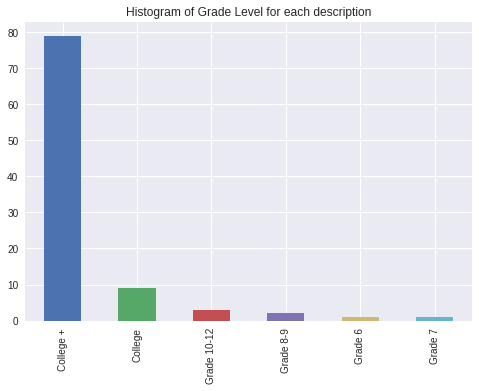

In [112]:

df['description_grade_level'].value_counts().plot.bar(title='Histogram of Grade Level for each description');